In [16]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [17]:
# Load dataset
def load_data():
    data = pd.read_csv('../data/00-raw-data/ADHD-comment.csv')
    return data

In [18]:
adhd_df = load_data()
adhd_df.head()

,body,id,score,created_utc,created_datetime
0,[deleted],c08otkh,1.0,1.239042e+09,2009-04-06 18:18:07
1,"If I try to look this up right now I will get distracted and never remember, so... What warnings...",c09y8qz,2.0,1.243790e+09,2009-05-31 17:08:19
2,potassium is used as the thing that stops your heart from beating in lethal injections so the wa...,c09yia6,2.0,1.243815e+09,2009-06-01 00:07:50
3,I've love a link to anything about this. \n\nI have to say the taste of KCl is seriously nasty....,c0a81e6,3.0,1.244752e+09,2009-06-11 20:25:36
4,"I don't know anything specific, but I would *definitely* look into possible effects on kidney fu...",c0aixrg,2.0,1.245813e+09,2009-06-24 03:04:51


In [19]:
 df = adhd_df.head(100)

In [20]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords (if not already downloaded)

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Sample DataFrame
data = {'TextColumn': ["This is an example sentence with some 123 numbers!",
                       "Another sentence with special characters #@!",
                       "Text data for cleaning and preprocessing."]}

#df = pd.DataFrame(data)

# Function to clean text in a column
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenization
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Remove numbers
    words = [word for word in words if not word.isdigit()]

    # Remove special characters
    words = [re.sub(r"[^a-zA-Z0-9]", "", word) for word in words]

    # Lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a string
    cleaned_text = " ".join(words)

    return cleaned_text

# Apply the cleaning function to the 'TextColumn'
df['body'] = df['body'].apply(clean_text)

# Display the cleaned DataFrame
print(df)


                                                                                                   body  \
0                                                                                               deleted   
1   try look right get distracted never remember warning come large dos potassium much large dose of...   
2   potassium used thing stop heart beating lethal injection warning overdue die im taking slightly ...   
3   ive love link anything say taste kcl seriously nasty cut nacl use seasoning bury early ingredien...   
4   dont know anything specific would definitely look possible effect kidney function health im sayi...   
..                                                                                                  ...   
95  sometimes similar issue personally think part like whole life ive little easygoing never really ...   
96  vyanese fucked man switched month adderall put anxiety overload couldnt sit work hour get go som...   
97                                   

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/bd/fz7166695vq0bg9w400f8zl40000gn/T/ipykernel_10723/3730341994.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = df['body'].apply(clean_text)


In [21]:
df  = pd.DataFrame(df[['id', 'body','score']])

In [22]:
df.head()

,id,body,score
0,c08otkh,deleted,1.0
1,c09y8qz,try look right get distracted never remember warning come large dos potassium much large dose of...,2.0
2,c09yia6,potassium used thing stop heart beating lethal injection warning overdue die im taking slightly ...,2.0
3,c0a81e6,ive love link anything say taste kcl seriously nasty cut nacl use seasoning bury early ingredien...,3.0
4,c0aixrg,dont know anything specific would definitely look possible effect kidney function health im sayi...,2.0


In [23]:
# Assuming 'text_column' is the column containing text data in your DataFrame
print("Number of Documents:", len(df))
print("Average Length of Documents:", df['body'].apply(len).mean())
print("Minimum Length of Documents:", df['body'].apply(len).min())
print("Maximum Length of Documents:", df['body'].apply(len).max())


Number of Documents: 100
Average Length of Documents: 209.65
Minimum Length of Documents: 4
Maximum Length of Documents: 1833


In [24]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['body'] = df['body'].apply(lambda x: remove_punct(x))
df.head(10)

,id,body,score
0,c08otkh,deleted,1.0
1,c09y8qz,try look right get distracted never remember warning come large dos potassium much large dose of...,2.0
2,c09yia6,potassium used thing stop heart beating lethal injection warning overdue die im taking slightly ...,2.0
3,c0a81e6,ive love link anything say taste kcl seriously nasty cut nacl use seasoning bury early ingredien...,3.0
4,c0aixrg,dont know anything specific would definitely look possible effect kidney function health im sayi...,2.0
5,c0fjlvp,despite continued controversy powerful new evidence regarding biological underpinnings adhd rece...,1.0
6,c0gon7n,look uninformed attitude professional others think cant smart adhd,0.0
7,c0o96zz,month go,1.0
8,c0rv6oz,think try,1.0
9,c0rv6pc,maybe died p,1.0


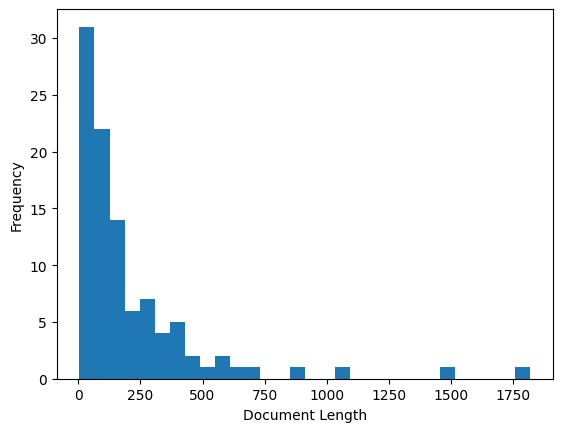

In [25]:
#histogram
plt.hist(df['body'].apply(len), bins=30)
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.show()

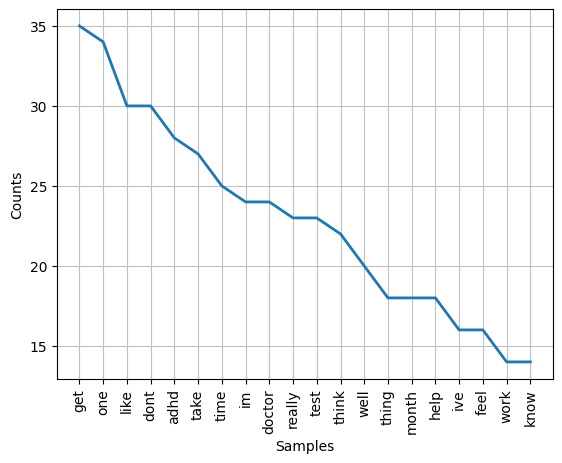

In [26]:
#Word Frequency Analysis:
from nltk import FreqDist
import matplotlib.pyplot as plt

words = nltk.word_tokenize(" ".join(df['body']))
word_freq = FreqDist(words)

# Plot the top N most common words
N = 20
word_freq.plot(N, cumulative=False)
plt.show()

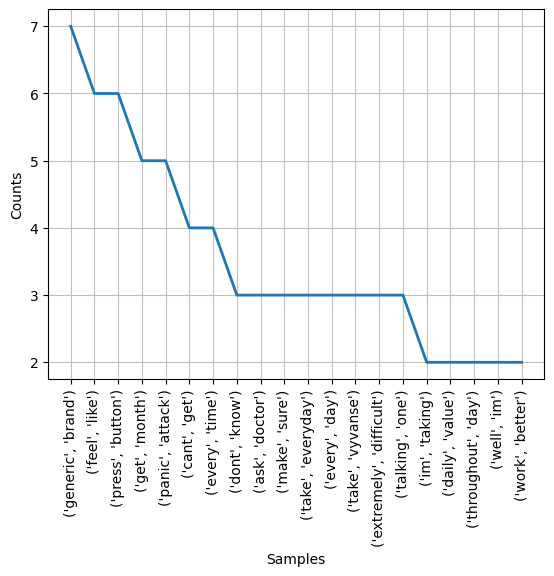

In [27]:
from nltk.util import ngrams

# Example for bigrams
bigrams = list(ngrams(words, 2))
bigram_freq = FreqDist(bigrams)

# Plot the top N most common bigrams
N = 20
bigram_freq.plot(N, cumulative=False)
plt.show()

In [30]:
df.to_csv('../data/01-modified-data/adhd_clean.csv', index=False)